In [1]:
import datetime
import pyaurorax

aurorax = pyaurorax.PyAuroraX()
at = aurorax.tools
at.set_theme("dark")

# **Injecting NaNs into a keogram**

Occasionally, data from an instrument may be missing for particular timestamps, whether it be that the instrument skipped a single frame, or ceased imaging for an extended period of time due to operational problems. When a keogram is created using `aurorax.tools.keogram.create()`, it will only include timestamps for which data exists. One may desire to indicate missing data in the keogram, and this notebook provides an example of doing just that!

In [2]:
# download an hour of RGB data
dataset_name = "TREX_RGB_RAW_NOMINAL"
start_dt = datetime.datetime(2022, 3, 12, 10, 0)
end_dt = datetime.datetime(2022, 3, 12, 10, 59)
site_uid = "gill"
r = aurorax.data.ucalgary.download(dataset_name, start_dt, end_dt, site_uid=site_uid)

In [3]:
# read in the hour of data, and scale it
data = aurorax.data.ucalgary.read(r.dataset, r.filenames, n_parallel=5)
images_scaled = at.scale_intensity(data.data, min=10, max=120)

### **Generate keogram**

First, let's just generate a keogram for an hour of data taken by a TREx-RGB imager located at Gillam, MB, for the time indicated below

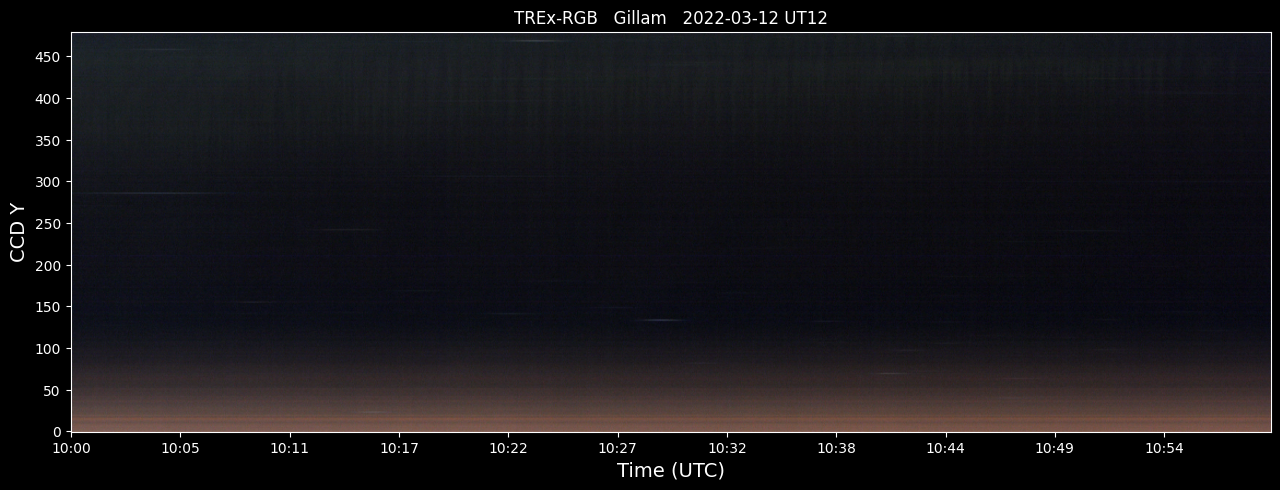

In [4]:
# create the keogram
keogram = at.keogram.create(images_scaled, data.timestamp)

# use the keogram's 'plot' method to show the keogram
keogram.plot(
    title="TREx-RGB   Gillam   %s" % (start_dt.strftime("%Y-%m-%d UT%d")),
    figsize=(12, 4),
    aspect="auto",
)

### **Note: Missing Data**

For an hour of nominal TREx-RGB data, we would expect one frame every 3 seconds = 20 frames per minute, resulting in 20 * 60 = 1200 frames for that hour of data...

The above keogram ***looks*** fine, but let's inspect the shape...

In [5]:
# Print the keogram's shape
print(keogram.data.shape)

(480, 1098, 3)


This keogram only has 1098 pixels in the x-direction, i.e. it is made up of only 1098 frames as opposed to the expected 1200. There is some missing data!

To display this behaviour, we can use the keogram class's built-in `inject_nans()` method. This will add NaN columns to the keogram where there *should* be data.

In [6]:
keogram.inject_nans()

print(keogram.data.shape)

(480, 1200, 3)


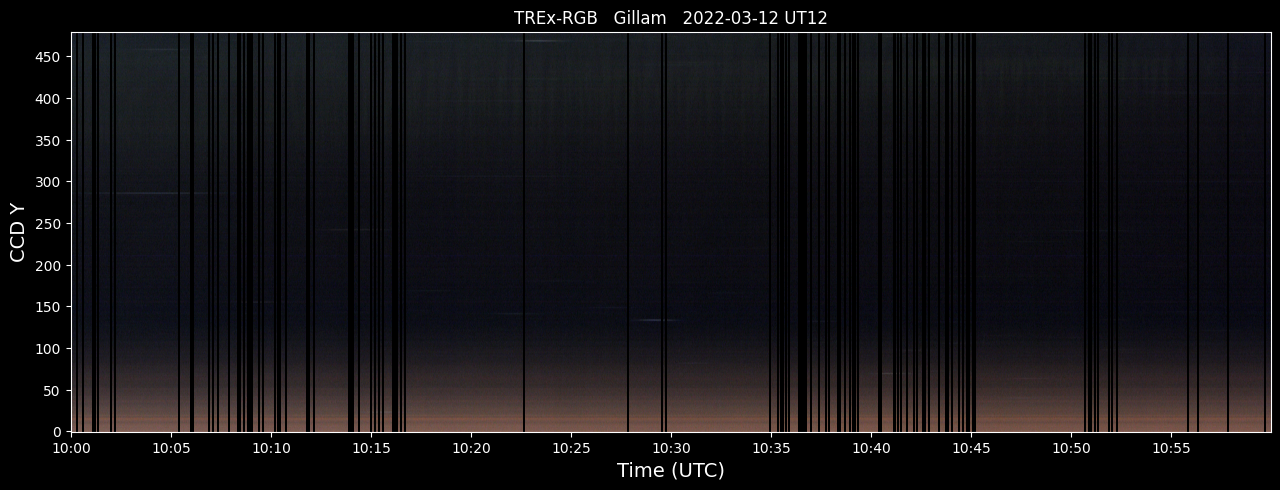

In [7]:
# Use the keogram's 'plot' method to show the keogram
keogram.plot(
    title="TREx-RGB   Gillam   %s" % (start_dt.strftime("%Y-%m-%d UT%d")),
    figsize=(12, 4),
    aspect="auto",
)

The above keogram now demonstrates that there are some frames missing from this hour of data!